# Dataset import

Run only one of the following two cells for importing the data, depending on the framework you are running the code with.
1. *Google Colab* from Google Drive
2. *Visual Studio Code*

### Google Colab

In [3]:
# Execute this cell only if running the code in Google Colab

from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection/creditcard.csv')

Mounted at /content/drive


### Visual Studio Code

In [4]:
# Execute this cell only if running the code in Visual Studio Code or similar framework

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard.csv')

# 1. Dataset pre-processing

In [47]:
print(df.describe(percentiles=[.25, .5, .75]))

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

### 1.1 Overview
The dataset is made up of 284807 transactions, each with a Time, Amount, 28 generic features and a label called Class, regarding the type of transaction, 1 for fraudolent or 0 for non-fraudolent.  

Analyzing the 'Class' label it is confirmed that the dataset is highly imbalanced, with only the 0.173% of the transactions in the dataset classified as fraudolent.

In [48]:
print(f"Dataset length: {len(df)}\n\n")
print(f"Columns names:\n {df.columns}\n\n")

print(f"Number of fraudolent transactions in the dataset:     {df[df['Class']==1]['Class'].count()}")
print(f"Number of non-fraudolent transactions in the dataset: {df[df['Class']==0]['Class'].count()}")
print(f"Percentage of fraudolent transactions in the dataset: {round(df[df['Class']==1]['Class'].count()/df[df['Class']==0]['Class'].count()*100,3)}%")

Dataset length: 283726


Columns names:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Number of fraudolent transactions in the dataset:     473
Number of non-fraudolent transactions in the dataset: 283253
Percentage of fraudolent transactions in the dataset: 0.167%


### 1.2 Duplicates deletion
The number of fraudulent transactions is rechecked after removing duplicates, as it is already quite negligible to begin with.

In [49]:
df.drop_duplicates(inplace=True)
print(f"Number of fraudolent transactions in the dataset after removing duplicates:     {df[df['Class']==1]['Class'].count()}")

Number of fraudolent transactions in the dataset after removing duplicates:     473


### 1.3   'Time' and 'Amount' trends

From the plots below:
- 'Time' exhibits a consistent monotonically increasing trend across the dataset.
- 'Amount' does not seem to follow any particular trend along the dataset.

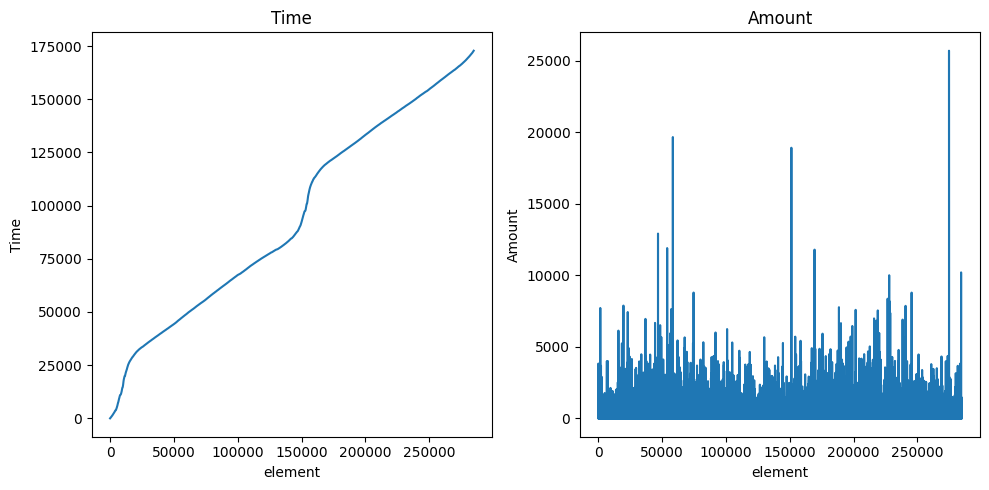

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Time'])
plt.xlabel('element')
plt.ylabel('Time')
plt.title('Time')

plt.subplot(1, 2, 2)
plt.plot(df['Amount'])
plt.xlabel('element')
plt.ylabel('Amount')
plt.title('Amount')

plt.tight_layout()
plt.show()

### 1.4   'Time' and 'Amount' distribution

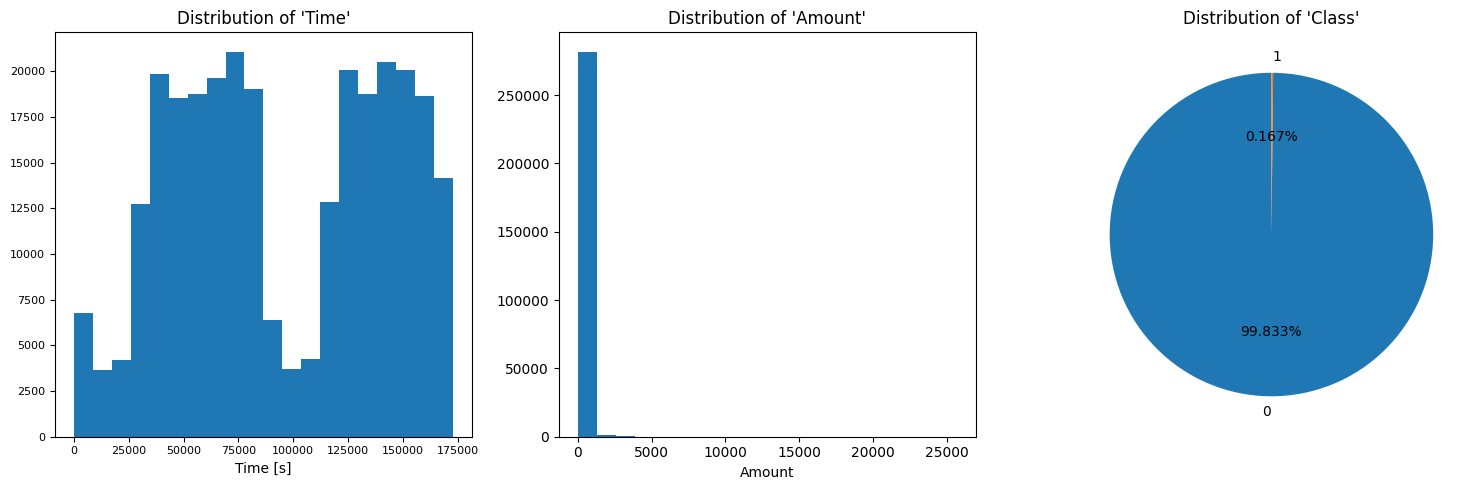

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Time'], bins=20)
plt.title('Distribution of \'Time\'')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Time [s]')

plt.subplot(1, 3, 2)
plt.hist(df['Amount'], bins=20)
plt.title('Distribution of \'Amount\'')
plt.xlabel('Amount')

plt.subplot(1, 3, 3)
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.3f%%', startangle=90)
plt.title('Distribution of \'Class\'')

plt.tight_layout()
plt.show()

Time distribution has two peaks.  
The time window seems to be 48 hours.  
Hence, the two peaks may correspond to the daily activity in two days (48 hours).
To verify this, I developed a function to transform 'Time' from seconds to the format 'hours:minutes'. This allows to have a better visual perception of the 'Time' distribution across the day in the plot.  
The peaks of transactions are strictly correlated to the daytime activity, while the transactions during the night time are significantly reduced.

Time window in hours: 48


Text(0.5, 0, 'Time [s]')

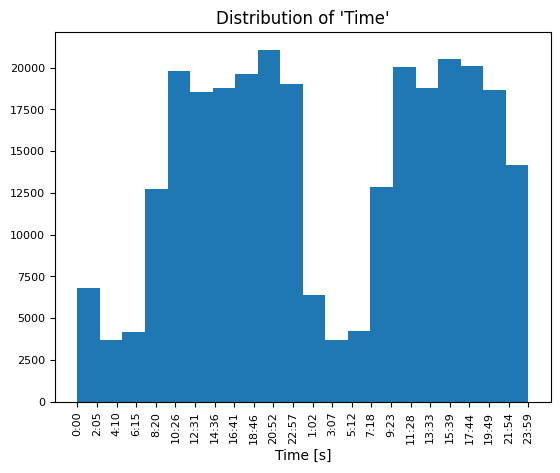

In [53]:
print(f"Time window in hours: {round(df['Time'].max()/3600)}")

def seconds_to_hours(seconds):
    ''' Transform seconds to a string in the format hours:minutes
    '''
    hours, remainder = divmod(seconds, 3600)
    minutes,_ = divmod(remainder, 60)
    hours = round(hours)
    minutes = round(minutes)
    if len(str(minutes))==1:
        minutes = '0'+str(minutes)
    else:
        str(minutes)

    if hours>24:
        hours-=24
    return str(hours) + ':' + str(minutes)

''' Plot 'Time' distribution translated from seconds to hh:mm '''
fig, ax = plt.subplots()
plt.hist(df['Time'], bins=20)
plt.title('Distribution of \'Time\'')

tick_positions = np.linspace(0, df['Time'].max(), 24)
tick_labels = []
for val in tick_positions:
    tick_labels.append(seconds_to_hours(val))

plt.xticks(tick_positions, tick_labels, rotation='vertical', fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Time [s]')

### 1.5 Feature correlation analysis

To identify any correlation among the features the correlation map of the dataset is plotted.  
A table with the highest 10 (absolute) correlations values is printed below.  

The following correlations stand out:
- **V2** and **Amount** with a value of **-0.531** (sign from the heatmap below)
- **V3** and **Time**   with a value of **-0.419** (sign from the heatmap below)
- **V7** and **Amount** with a value of **0.397**
- **V5** and **Amount** with a value of **-0.386** (sign from the heatmap below)

Except for **'Time'** and **'Amount'**, all the **V-** features are completely unrelated to each other, some Dimensionality Reduction technique, such as PCA, may have already been applied to them.

It is decided not to removed any features before building the classification model.

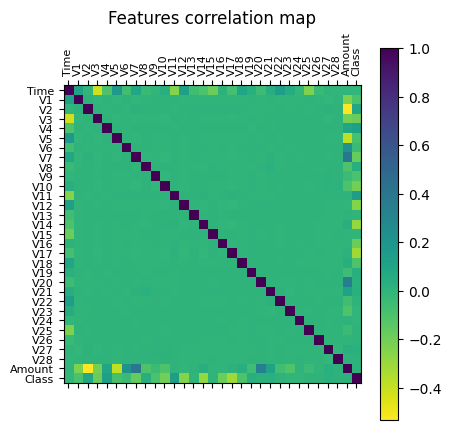

Top 10 Correlations:
Amount  V2        0.533428
V3      Time      0.422054
Amount  V7        0.400408
V5      Amount    0.387685
Amount  V20       0.340729
Class   V17       0.313498
        V14       0.293375
        V12       0.250711
Time    V11       0.248536
V25     Time      0.233262
dtype: float64


In [54]:
corr = df.corr()
plt.matshow(corr, cmap='viridis_r') # colormap is reversed so that bright colors indicate higher negative correlation
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, fontsize=8, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns, fontsize=8)
plt.title('Features correlation map')
plt.show()

corr = corr.abs() # Compute absolute correlation values to have the highset absolute values ordered and only consider the highset ones
np.fill_diagonal(corr.values, np.nan) # Fill diagonal with NaN, as of course these values will be the highest and the least interesting
top_correlations = corr.unstack().sort_values(ascending=False).nlargest(20) # Flatten the correlation matrix and find the top 5 correlations
top_correlation_columns = [(pair[0], pair[1]) for pair in top_correlations.index] # Extract the corresponding column pairs

# Display the result
print("Top 10 Correlations:")
print(top_correlations[::2]) # Only print the odd lines, since the feature pairs consistently appear in mirrored versions (e.g. if A and B are highly correlated, also B and A are)

# 2. Classification

**Random forest** is chosen as classification algorithm as it is a **simple** model that can handle **complex datasets** and is **less prone to overfitting** than other models.

In [55]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

## 2.1 Splitting the dataset in training and validation set

The ***'stratify'*** parameter in **train_test_split()** is crucial for maintaining the proportions of both *data* and *labels* in the training and validation datasets, keepeing their distribution as in the original dataset. This becomes particularly significant with such an imbalanced dataset as this one.  

70% of the original dataset is used for training the model, while the remaingin 30% is used for testing it.

In [56]:
data = df.drop('Class', axis=1)
labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels, test_size = 0.3, random_state = 10, shuffle=True)

## 2.2 Data standardization

The features are standardized removing the mean and rescaling to unit standard deviation with *StandardScaler( )*.

In [57]:
scaler = StandardScaler().set_output(transform="pandas")
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 2.3 Stratified K-fold cross-validation
K-fold cross-validation is a well-known technique to estimate the skill of the model on new sets of data, besides the training one, preventing the model to overfit.  
Stratified K-fold cross-validation is particularly suited for imbalanced datasets, as it creates stratified subsets that preserve the original class proportions in the individual folds.  

The method *StratifiedKFold( )* does the job.

In [58]:
KF = StratifiedKFold(n_splits=5, shuffle=False)

## 2.4 Standard classification model

### 2.4.1 Random Forest Classifier definition

In [59]:
''' Random Forest Classifier (RFC) '''

RFC = RandomForestClassifier(max_depth=100, random_state=10)

# Defining the parameters within which to conduct the search for the optimal ones
params = {'n_estimators': [50, 100, 150], 'max_depth': [6, 8, 10], 'random_state': [10]}

### 2.4.2 Grid search

In [60]:
RFC_grid = GridSearchCV(RFC, param_grid=params, cv=KF, scoring='recall').fit(X_train, y_train)

print('Best parameters:', RFC_grid.best_params_)
print('Best score:', RFC_grid.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 10}
Best score: 0.758254183627318


In [61]:
y_pred = RFC_grid.predict(X_test)

### 2.4.3 Metrics for model evaluation on test set
The best metric to evaluate the classification performance of the model with such a dataset is the **recall**, as in evaluating the model it stressed the importance of avoiding false negative classification (fraudolent payments being classified as legitimate ones).


Metrics
Accuracy:   0.9996
Precision:  0.9483
Recall:     0.7746
F1:         0.8527




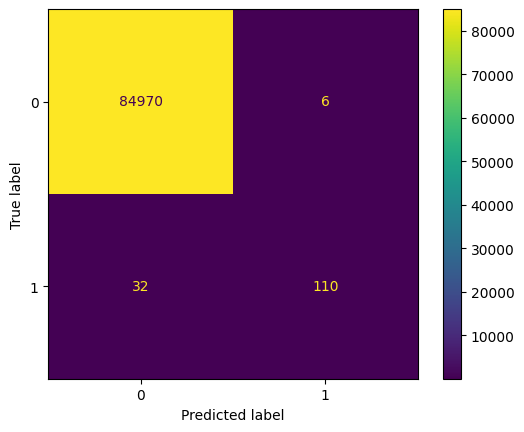

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=RFC_grid.classes_)

Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy,4)}")
print(f"Precision:  {round(Precision,4)}")
print(f"Recall:     {round(Recall,4)}")
print(f"F1:         {round(F1,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,  display_labels=RFC_grid.classes_)
disp.plot()
plt.show()

### 2.4.4 Weighted classes

The Scikit-learn library enables the assignment of weights to classes in various classification models, including Random Forest.  
This feature enables the balancing of class importance based on factors such as their frequency in the dataset, making it particularly beneficial for handling imbalanced datasets.


In [63]:
# Define balanced classes Random Forest
RFC_balanced = RandomForestClassifier(max_depth=100, random_state=10, class_weight="balanced")

In [64]:
# Gridsearch
RFC_balanced_grid = GridSearchCV(RFC_balanced, param_grid=params, cv=KF, scoring='recall').fit(X_train, y_train)

print('Best parameters:', RFC_balanced_grid.best_params_)
print('Best score:', RFC_balanced_grid.best_score_)

Best parameters: {'max_depth': 6, 'n_estimators': 150, 'random_state': 10}
Best score: 0.8278606965174129


In [65]:
# Model prediction
y_pred_balanced = RFC_balanced_grid.predict(X_test)


Metrics
Accuracy:   0.9986
Precision:  0.5442
Recall:     0.8662
F1:         0.6685




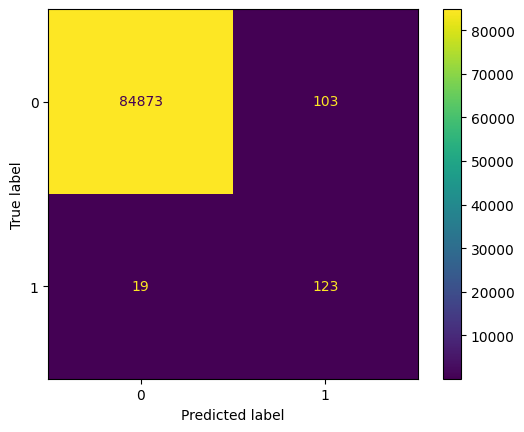

In [66]:
# Model evaluation
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced, labels=RFC_balanced_grid.classes_)

Recall_balanced = recall_score(y_test, y_pred_balanced)
Precision_balanced = precision_score(y_test, y_pred_balanced)
F1_balanced = f1_score(y_test, y_pred_balanced)
Accuracy_balanced = accuracy_score(y_test, y_pred_balanced)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy_balanced,4)}")
print(f"Precision:  {round(Precision_balanced,4)}")
print(f"Recall:     {round(Recall_balanced,4)}")
print(f"F1:         {round(F1_balanced,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_balanced,  display_labels=RFC_balanced_grid.classes_)
disp.plot()
plt.show()

## 2.5 Resampling

A widely used technique for imbalanced datasets is **resampling** the original imbalanced training dataset to crerate a new balanced one.  
These methods aim to rectify the skewed class distribution by either oversampling the minority class, undersampling the majority class, or a combination of both. By doing so, resampling helps prevent model bias toward the majority class.

### 2.5.1 Random oversampling

By randomly oversampling the minority class there is a potential risk of overfitting, as the technique involves duplicating its elements.

In [67]:
from imblearn.over_sampling import RandomOverSampler

X_train_over, y_train_over =  RandomOverSampler(random_state=10).fit_resample(X_train, y_train)

# Check the number of elements of each class to assess oversampling
print('Before oversampling')
print(f"Number of legitimate transactions: {len(y_train.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train.loc[lambda x : x == 1])}\n")
print('After oversampling')
print(f"Number of legitimate transactions: {len(y_train_over.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train_over.loc[lambda x : x == 1])}")

Before oversampling
Number of legitimate transactions: 198277
Number of fraudolent transactions: 331

After oversampling
Number of legitimate transactions: 198277
Number of fraudolent transactions: 198277


**Grid search**

For the gridsearch in case of resampled training datasets, the same parameters employed above are used.  
Also, the same k-fold cross validation is used.

In [68]:
# Gridsearch
RFC_over_grid = GridSearchCV(RFC, param_grid=params, cv=KF, scoring='recall').fit(X_train_over, y_train_over)

print('Best parameters:', RFC_over_grid.best_params_)
print('Best score:', RFC_over_grid.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 50, 'random_state': 10}
Best score: 1.0


In [69]:
# Model prediction
y_pred_over = RFC_over_grid.predict(X_test)

**Metrics for model evaluation on test set**


Metrics
Accuracy:   0.9992
Precision:  0.7358
Recall:     0.8239
F1:         0.7774




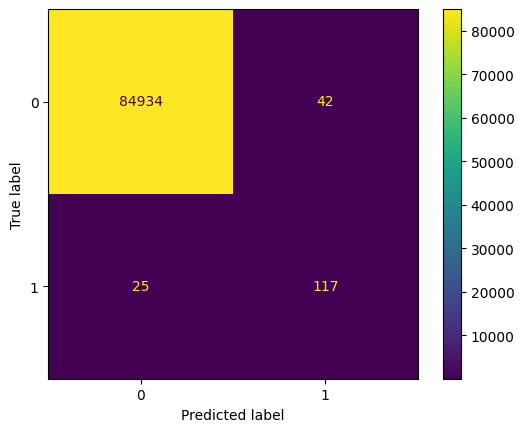

In [70]:
# Model evaluation
conf_matrix_over = confusion_matrix(y_test, y_pred_over, labels=RFC_over_grid.classes_)

Recall_over = recall_score(y_test, y_pred_over)
Precision_over = precision_score(y_test, y_pred_over)
F1_over = f1_score(y_test, y_pred_over)
Accuracy_over = accuracy_score(y_test, y_pred_over)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy_over,4)}")
print(f"Precision:  {round(Precision_over,4)}")
print(f"Recall:     {round(Recall_over,4)}")
print(f"F1:         {round(F1_over,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_over,  display_labels=RFC_over_grid.classes_)
disp.plot()
plt.show()

### 2.5.2 Random undersampling

Undersampling method involves reducing the size of the majority class to align with the minority class.

In [71]:
from imblearn.under_sampling import RandomUnderSampler

X_train_under, y_train_under = RandomUnderSampler(random_state=10).fit_resample(X_train, y_train)

# Check the number of elements of each class to assess undersampling
print('Before undersampling')
print(f"Number of legitimate transactions: {len(y_train.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train.loc[lambda x : x == 1])}\n")
print('After undersampling')
print(f"Number of legitimate transactions: {len(y_train_under.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train_under.loc[lambda x : x == 1])}")

Before undersampling
Number of legitimate transactions: 198277
Number of fraudolent transactions: 331

After undersampling
Number of legitimate transactions: 331
Number of fraudolent transactions: 331


In [72]:
# Gridsearch
RFC_under_grid = GridSearchCV(RFC, param_grid=params, cv=KF, scoring='recall').fit(X_train_under, y_train_under)

print('Best parameters:', RFC_under_grid.best_params_)
print('Best score:', RFC_under_grid.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 150, 'random_state': 10}
Best score: 0.9092718227046586


In [73]:
# Model prediction
y_pred_under = RFC_under_grid.predict(X_test)


Metrics
Accuracy:   0.9671
Precision:  0.0452
Recall:     0.9296
F1:         0.0862




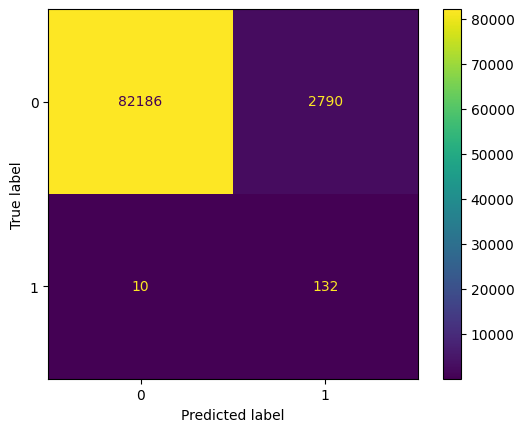

In [74]:
# Model evaluation
conf_matrix_under = confusion_matrix(y_test, y_pred_under, labels=RFC_under_grid.classes_)

Recall_under = recall_score(y_test, y_pred_under)
Precision_under = precision_score(y_test, y_pred_under)
F1_under = f1_score(y_test, y_pred_under)
Accuracy_under = accuracy_score(y_test, y_pred_under)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy_under,4)}")
print(f"Precision:  {round(Precision_under,4)}")
print(f"Recall:     {round(Recall_under,4)}")
print(f"F1:         {round(F1_under,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_under,  display_labels=RFC_under_grid.classes_)
disp.plot()
plt.show()

In the case of undersampling, the training dataset is too small to allow a good fit of the model, as can be seen from the metrics, especially F1 and Precision, resulting in extremely low scores.  
With the objective of classifying correctly as many fraudolent transactions as possible, random undersampling performs better than oversampling, but a great number of legitimate transactions are classified as fraudolent. For this reason the Recall is high and the Precision and F1 scores are extremely low.

### 2.5.3 SMOTE - Synthetic Minority Oversampling Technique

Unlike random oversampling which duplicates the elements belonging to the minority class, SMOTE is a well-known oversampling tehchnique that generates new data for the minority class by linearly interpolating new data points in between the existing ones.  

The risks using SMOTE are the possibility to generate unrealistic synthetic instances, as it may introduce noise into the dataset by creating samples that do not accurately reflect the class distribution or do not represent the underlying patterns in the minority class, causing loss of information and impacting the model's generalization ability. Moreover, the potential risk of overfitting should not be overlooked.

In [75]:
from imblearn.over_sampling import SMOTE

X_train_SMOTE,  y_train_SMOTE = SMOTE(random_state=10).fit_resample(X_train, y_train)

# Check the number of elements of each class to assess SMOTE
print('Before SMOTE')
print(f"Number of legitimate transactions: {len(y_train.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train.loc[lambda x : x == 1])}\n")
print('After SMOTE')
print(f"Number of legitimate transactions: {len(y_train_SMOTE.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train_SMOTE.loc[lambda x : x == 1])}")

Before SMOTE
Number of legitimate transactions: 198277
Number of fraudolent transactions: 331

After SMOTE
Number of legitimate transactions: 198277
Number of fraudolent transactions: 198277


In [76]:
# Gridsearch
RFC_SMOTE_grid = GridSearchCV(RFC, param_grid=params, cv=KF, scoring='recall').fit(X_train_SMOTE, y_train_SMOTE)

print('Best parameters:', RFC_SMOTE_grid.best_params_)
print('Best score:', RFC_SMOTE_grid.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 10}
Best score: 0.9877545059240651


In [77]:
# Model prediction
y_pred_SMOTE = RFC_SMOTE_grid.predict(X_test)


Metrics
Accuracy:   0.9979
Precision:  0.44
Recall:     0.8521
F1:         0.5803




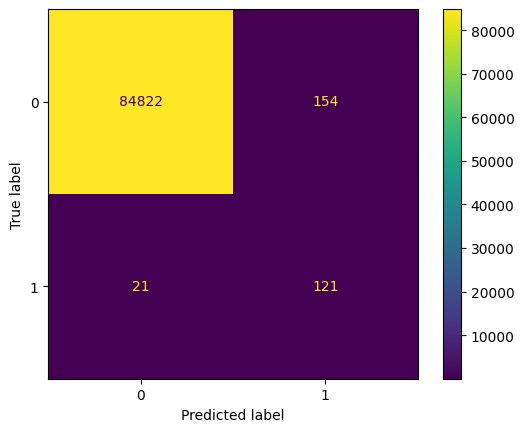

In [78]:
# Model evaluation
conf_matrix_SMOTE = confusion_matrix(y_test, y_pred_SMOTE, labels=RFC_SMOTE_grid.classes_)

Recall_SMOTE = recall_score(y_test, y_pred_SMOTE)
Precision_SMOTE = precision_score(y_test, y_pred_SMOTE)
F1_SMOTE = f1_score(y_test, y_pred_SMOTE)
Accuracy_SMOTE = accuracy_score(y_test, y_pred_SMOTE)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy_SMOTE,4)}")
print(f"Precision:  {round(Precision_SMOTE,4)}")
print(f"Recall:     {round(Recall_SMOTE,4)}")
print(f"F1:         {round(F1_SMOTE,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_SMOTE,  display_labels=RFC_SMOTE_grid.classes_)
disp.plot()
plt.show()

### 2.5.4 Mixed approach

A mixed appach is considered to exploit the best out of some of the aforementioned techniques.  
1. Random **undersampling** is applied to obtain a dataset proportion $N_m/N_M=0.15$, where $N_m$ is the number of elements in the minority class and $N_M$ is the number of elements in the majority class.  
2. Then **SMOTE** is usd to increase the dimension of the minority class up to 8% of the majority class.  
3. Finally a **balanced-class Random Forest** classifier is employed to fit the data.

In [79]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X_train_mix, y_train_mix = RandomUnderSampler(sampling_strategy=0.15, random_state=10).fit_resample(X_train, y_train)

# Check the number of elements of each class to assess udnersampling
print('Before undersampling')
print(f"Number of legitimate transactions: {len(y_train.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train.loc[lambda x : x == 1])}\n")
print('After undersampling')
print(f"Number of legitimate transactions: {len(y_train_mix.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train_mix.loc[lambda x : x == 1])}\n")

X_train_mix,  y_train_mix = SMOTE(sampling_strategy=0.8, random_state=10).fit_resample(X_train_mix, y_train_mix)

# Check the number of elements of each class to assess SMOTE
print('After SMOTE')
print(f"Number of legitimate transactions: {len(y_train_mix.loc[lambda x : x == 0])}")
print(f"Number of fraudolent transactions: {len(y_train_mix.loc[lambda x : x == 1])}")

Before undersampling
Number of legitimate transactions: 198277
Number of fraudolent transactions: 331

After undersampling
Number of legitimate transactions: 2206
Number of fraudolent transactions: 331

After SMOTE
Number of legitimate transactions: 2206
Number of fraudolent transactions: 1764


In [80]:
# Balanced RFC definition and Gridsearch
RFC_balanced = RandomForestClassifier(max_depth=100, random_state=10, class_weight="balanced")
RFC_mix_grid = GridSearchCV(RFC_balanced, param_grid=params, cv=KF, scoring='recall').fit(X_train_mix, y_train_mix)

print('Best parameters:', RFC_mix_grid.best_params_)
print('Best score:', RFC_mix_grid.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100, 'random_state': 10}
Best score: 0.9608888101983002


In [81]:
# Model prediction
y_pred_mix = RFC_mix_grid.predict(X_test)


Metrics
Accuracy:   0.9943
Precision:  0.2122
Recall:     0.8803
F1:         0.342




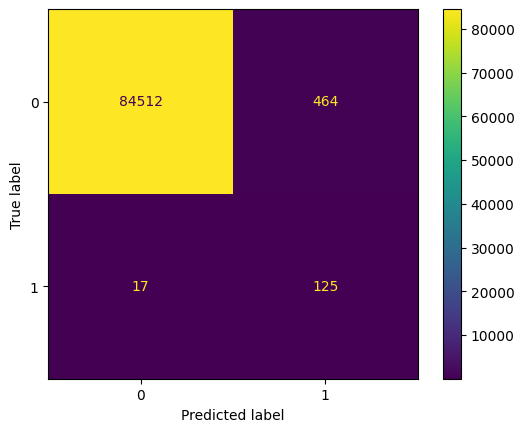

In [82]:
# Model evaluation
conf_matrix_mix = confusion_matrix(y_test, y_pred_mix, labels=RFC_mix_grid.classes_)

Recall_mix = recall_score(y_test, y_pred_mix)
Precision_mix = precision_score(y_test, y_pred_mix)
F1_mix = f1_score(y_test, y_pred_mix)
Accuracy_mix = accuracy_score(y_test, y_pred_mix)

print('\nMetrics')
print(f"Accuracy:   {round(Accuracy_mix,4)}")
print(f"Precision:  {round(Precision_mix,4)}")
print(f"Recall:     {round(Recall_mix,4)}")
print(f"F1:         {round(F1_mix,4)}\n\n")


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mix,  display_labels=RFC_mix_grid.classes_)
disp.plot()
plt.show()

# 2.6 Performance Summary

In [83]:
from tabulate import tabulate

table = [['',                    'Recall',         'Accuracy',         'Precision',        'F1'],
         ['Reference model',      Recall,           Accuracy,           Precision,          F1],
         ['Weighted classes',     Recall_balanced,  Accuracy_balanced,  Precision_balanced, F1_balanced],
         ['Rand. Oversampling',   Recall_over,      Accuracy_over,      Precision_over,     F1_over],
         ['Rand. Undersampling',  Recall_under,     Accuracy_under,     Precision_under,    F1_under],
         ['SMOTE',                Recall_SMOTE,     Accuracy_SMOTE,     Precision_SMOTE,    F1_SMOTE],
         ['Mixed model',          Recall_mix,       Accuracy_mix,       Precision_mix,      F1_mix]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤══════════╤════════════╤═════════════╤═══════════╕
│                     │   Recall │   Accuracy │   Precision │        F1 │
╞═════════════════════╪══════════╪════════════╪═════════════╪═══════════╡
│ Reference model     │ 0.774648 │   0.999554 │   0.948276  │ 0.852713  │
├─────────────────────┼──────────┼────────────┼─────────────┼───────────┤
│ Weighted classes    │ 0.866197 │   0.998567 │   0.544248  │ 0.668478  │
├─────────────────────┼──────────┼────────────┼─────────────┼───────────┤
│ Rand. Oversampling  │ 0.823944 │   0.999213 │   0.735849  │ 0.777409  │
├─────────────────────┼──────────┼────────────┼─────────────┼───────────┤
│ Rand. Undersampling │ 0.929577 │   0.967104 │   0.0451745 │ 0.0861619 │
├─────────────────────┼──────────┼────────────┼─────────────┼───────────┤
│ SMOTE               │ 0.852113 │   0.997944 │   0.44      │ 0.580336  │
├─────────────────────┼──────────┼────────────┼─────────────┼───────────┤
│ Mixed model         │ 0.880282 │   0

### 2.6.1 Final considerations
The final model selection depends on the desired value to minimize or metric to maximize.  
In the context of Credit Card Fraud Detection, the priority is to minimize false negatives, as false positives are deemed less concerning.  
The models that performed better at minimizing false negatives, corresponding to maximizing Recall score, are:  
- Random Undersampling, despite exhibiting significantly poor performance in minimizing false positives.
- the mixed model, with partial Random Undersampling, SMOTE and finally balancing the dataset with weighted classes. resulting in better Precision and F1 score than Random Undersampling.
- Weighted class
- SMOTE  

Achieving an optimal balance between minimizing false negatives and false positives in the presence of an imbalanced dataset is a non-trivial task.  
Further efforts can be directed towards fine-tuning the parameters involved in the process.

---
# 2.7 Model Deployment Strategy for Credit Card Fraud Detection

### Goal
The primary objective of the deployment strategy is to integrate the trained Credit Card Fraud Detection model, selected among the ones inspected, into a real-time system, allowing for on-the-fly predictions.

## Steps

1. **Model Serialization:**
   - Serialize the trained model into a deployable format (e.g., pickle, joblib) for ease of deployment.

2. **Containerization:**
   - Utilize containerization tools like Docker to encapsulate the model and its dependencies into a standalone container. This ensures consistency and portability across different environments.

3. **Model API:**
   - Develop a RESTful API (Application Programming Interface) to expose the model's prediction functionality. Tools like Flask or FastAPI can be employed for this purpose.

4. **Cloud Deployment:**
   - Deploy the containerized model on a cloud platform (e.g., AWS, Azure, Google Cloud) for scalability, reliability, and ease of maintenance.

5. **Load Balancing:**
   - Implement load balancing mechanisms to distribute incoming prediction requests evenly across multiple instances of the deployed model. This ensures optimal performance during varying levels of traffic.

6. **Monitoring and Logging:**
   - Set up monitoring tools to track model performance, response times, and resource utilization. Implement logging to record important events and errors for later analysis.

7. **Security Measures:**
   - Implement security measures to safeguard the deployed model and API. This includes authentication mechanisms, encryption, and access controls.

8. **Scaling and Autoscaling:**
   - Design the deployment to scale horizontally by adding more instances based on demand. Implement autoscaling policies to automatically adjust the number of instances to handle varying workloads.

9. **Continuous Integration/Continuous Deployment (CI/CD):**
   - Establish a CI/CD pipeline to facilitate automated testing, model updates, and seamless deployment. This ensures a smooth workflow from development to production.

10. **Documentation:**
    - Provide comprehensive documentation for developers and stakeholders, detailing how to interact with the API, expected inputs, and interpretation of outputs.

11. **Feedback Loop:**
    - Set up a feedback loop to continuously monitor model performance in the production environment. Use the insights gained to refine and improve the model over time.

12. **Versioning:**
    - Implement version control for the deployed model to support backward compatibility and easy rollback in case of issues with newer versions.

Adjustments may be necessary based on specific requirements and the chosen deployment environment.

